#  FlipKart reviews Sentiment Analysis and Text Classification

## Import Data and Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline

In [2]:
df = pd.read_csv('Dataset-SA.csv')

In [3]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


## Data Cleaning

In [5]:
df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [6]:
reviews = df['Review'].value_counts().sort_values(ascending=False)

In [7]:
reviews[:10]

wonderful            9016
not specified        8351
brilliant            5643
awesome              5636
great product        5622
classy product       5602
perfect product!     5600
worth every penny    5599
simply awesome       5595
super!               5586
Name: Review, dtype: int64

#### Removing the columns with wrong informations

In [8]:
df['Rate'].value_counts()

5                                                                    118765
4                                                                     41894
1                                                                     21300
3                                                                     16599
2                                                                      6491
Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)              1
Bajaj DX 2 L/W Dry Iron                                                   1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)         1
Name: Rate, dtype: int64

In [9]:
df = df[(df.Rate !='Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)') & (df.Rate != "Bajaj DX 2 L/W Dry Iron") & (df.Rate !='Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)')]

## Exploratory Research

In [10]:
df['Rate'].value_counts()

5    118765
4     41894
1     21300
3     16599
2      6491
Name: Rate, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205049 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205049 non-null  object
 1   product_price  205049 non-null  object
 2   Rate           205049 non-null  object
 3   Review         180385 non-null  object
 4   Summary        205038 non-null  object
 5   Sentiment      205049 non-null  object
dtypes: object(6)
memory usage: 11.0+ MB


(array([42165., 22486., 38712., 15871., 21037., 28349.,  8439., 11999.,
         7977.,  8014.]),
 array([  0. ,  52.1, 104.2, 156.3, 208.4, 260.5, 312.6, 364.7, 416.8,
        468.9, 521. ]),
 <BarContainer object of 10 artists>)

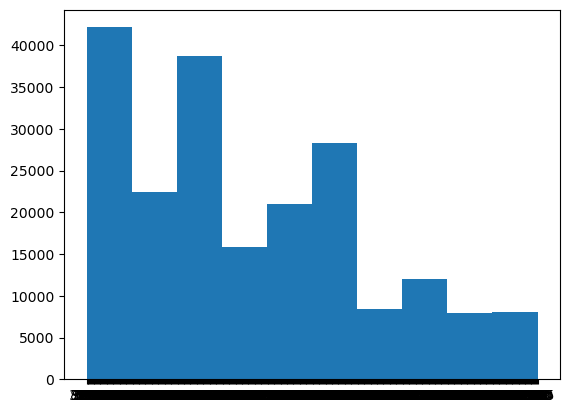

In [12]:
plt.hist(df['product_price'])

<AxesSubplot:xlabel='Rate', ylabel='Count'>

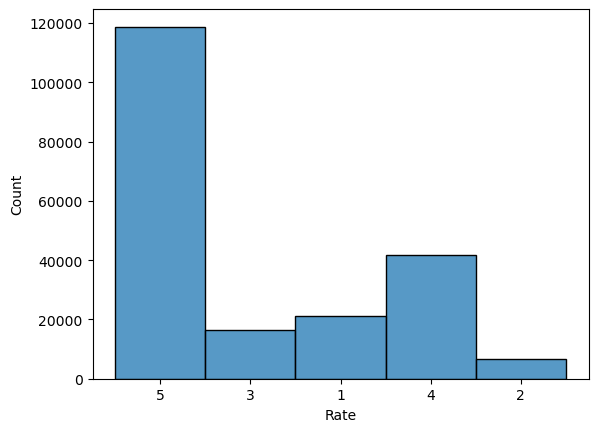

In [13]:
sns.histplot(df['Rate'])

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

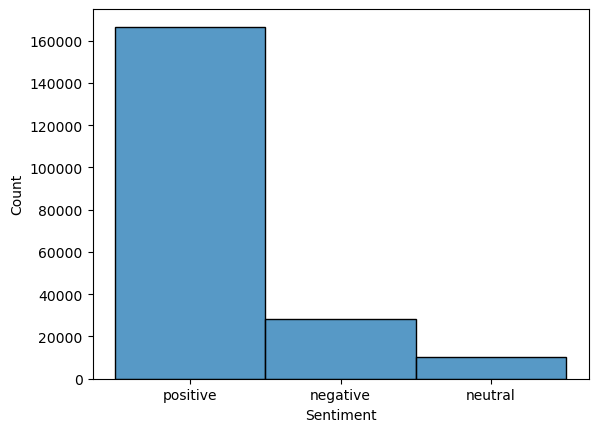

In [14]:
sns.histplot(df['Sentiment'])

#### Removing the puncuations

In [15]:
punctuations = string.punctuation

In [16]:
df['Review'] = df['Review'].str.replace('[{}]'.format(punctuations),'')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [17]:
df['Summary'] = df['Summary'].str.replace('[{}]'.format(punctuations),'')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [18]:
df['Summary'][:10]

0    great cooler excellent air flow and for this p...
1                best budget 2 fit cooler nice cooling
2    the quality is good but the power of air is de...
3                    very bad product its a only a fan
4                                        ok ok product
5    the cooler is really fantastic and provides go...
6                                    very good product
7                                            very nice
8                                      very bad cooler
9                                            very good
Name: Summary, dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205049 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205049 non-null  object
 1   product_price  205049 non-null  object
 2   Rate           205049 non-null  object
 3   Review         180385 non-null  object
 4   Summary        205038 non-null  object
 5   Sentiment      205049 non-null  object
dtypes: object(6)
memory usage: 11.0+ MB


## NLP Classification

### using summary and sentiments

In [20]:
df_class = df[(df.Sentiment=='positive') | (df.Sentiment=='negative')]

In [21]:
df_class = df_class.fillna(df_class.mode().iloc[0])

In [22]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194810 entries, 0 to 205050
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   194810 non-null  object
 1   product_price  194810 non-null  object
 2   Rate           194810 non-null  object
 3   Review         194810 non-null  object
 4   Summary        194810 non-null  object
 5   Sentiment      194810 non-null  object
dtypes: object(6)
memory usage: 10.4+ MB


In [23]:
x = df_class['Summary']
y = df_class['Sentiment']

#### Count Vectorization

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer()

In [26]:
X = cv.fit_transform(x)

#### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### Naive_bayers model 

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
nb = MultinomialNB()

In [31]:
nb.fit(X_train,y_train)

MultinomialNB()

#### Model Prediction and Evaluation

In [32]:
prediction = nb.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(confusion_matrix(y_test,prediction))

[[ 6148  2270]
 [ 1025 49000]]


In [35]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

    negative       0.86      0.73      0.79      8418
    positive       0.96      0.98      0.97     50025

    accuracy                           0.94     58443
   macro avg       0.91      0.85      0.88     58443
weighted avg       0.94      0.94      0.94     58443



#### Grid Search 

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_prior': [True, False],
}

In [38]:
grid_search = GridSearchCV(nb, param_grid, cv=5)

In [39]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'fit_prior': [True, False]})

In [40]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 1, 'fit_prior': False}
0.9443560392176993


There is not much difference in the result.

### Using Review and sentiments

In [41]:
df_class1 = df[(df.Sentiment=='positive') | (df.Sentiment=='negative')]

In [42]:
df_class1 = df_class1.fillna(df_class1.mode().iloc[0])

In [43]:
x = df_class1['Review']
y = df_class1['Sentiment']

In [44]:
X = cv.fit_transform(x)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [46]:
nb.fit(X_train,y_train)

MultinomialNB()

In [47]:
pred = nb.predict(X_test)

In [48]:
print(confusion_matrix(y_test,pred))

[[ 5503  2915]
 [  523 49502]]


In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.91      0.65      0.76      8418
    positive       0.94      0.99      0.97     50025

    accuracy                           0.94     58443
   macro avg       0.93      0.82      0.86     58443
weighted avg       0.94      0.94      0.94     58443



pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [50]:
df['Summary'] = df['Summary'].fillna('')

## Text Classification Model

In [51]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [52]:
#nltk.download('punkt')

In [53]:
stop_words = set(stopwords.words('english'))

In [54]:
def preprocess_text(text):
    # tokenize text
    tokens = word_tokenize(text.lower())
    # remove punctuation and stop words
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    # re-join filtered tokens into a string
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text
# apply preprocess function to summary column
df['preprocessed_summary'] = df['Summary'].apply(preprocess_text)

#### Count Vectorizer



In [55]:
bow_summary = cv.fit_transform(df['Summary'])

In [56]:
y = df['Sentiment']

# Map sentiment labels to numeric classes
class_mapping = {'positive': 0, 'neutral': 1, 'negative': 2}
y = y.map(class_mapping)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(bow_summary, y, test_size=0.2, random_state=42)

#### Multinomial Naive Bayes classifier

In [58]:
nb.fit(X_train,y_train)

MultinomialNB()

#### Prediction and evaluation

In [59]:
pred_tc = nb.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy = accuracy_score(y_test, pred_tc)
print('Accuracy:', accuracy)

Accuracy: 0.9001463057790783


In [62]:
print(confusion_matrix(y_test, pred_tc))
print(classification_report(y_test, pred_tc))

[[32600   128   726]
 [ 1397   273   408]
 [ 1397    39  4042]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     33454
           1       0.62      0.13      0.22      2078
           2       0.78      0.74      0.76      5478

    accuracy                           0.90     41010
   macro avg       0.77      0.61      0.64     41010
weighted avg       0.89      0.90      0.88     41010

